In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Implementación Proyecto Grado Maestría

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Implementación Proyecto Grado Maestría


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import pandas as pd
import os
import random

In [ ]:
dataPath = "all-mias"

In [ ]:
def intersection(x,y):
    intersection = np.logical_and(x, y)
    return intersection

In [ ]:
def plotOrigImages(names, images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(22,22))
    axes = axes.flatten()
    for name, img, ax in zip(names, images_arr, axes):
        ax.imshow(img)
        ax.set_title(name[:6], fontsize=20)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
def plotImages(names, images):
    green_patch = mpatches.Patch(color='lime', label='Ground truth')
    red_patch = mpatches.Patch(color='red', label='Segmented')
    yellow_patch = mpatches.Patch(color='yellow', label='Intersection')
    fig, axes = plt.subplots(1, 4, figsize=(22,22))
    #axes = axes.flatten()
    for name, img, ax in zip(names, images, axes):
        ax.legend(handles=[green_patch, red_patch, yellow_patch], prop={'size': 12}, loc='upper left')
        ax.imshow(img)
        ax.set_title(name, fontsize=20)
        ax.axis('on')
    plt.tight_layout()
    plt.show()

In [ ]:
def intersec_all(images_path, gt_masks_path, seg_masks_path, intersec_df):
  imgs = glob.glob(images_path+'*.png')
  imgs = sorted(imgs)
  gt_masks = glob.glob(gt_masks_path+'*.png')
  gt_masks = sorted(gt_masks)
  seg_masks = glob.glob(seg_masks_path+'*.png')
  seg_masks = sorted(seg_masks)
  overlaid_masks = []
  overlaid_names = []
  for image_path, gt_mask_path, seg_mask_path in zip(imgs, gt_masks, seg_masks):
      img = cv2.imread(image_path)
      gt_mask = cv2.imread(gt_mask_path, 0)
      seg_mask = cv2.imread(seg_mask_path, 0)
      intersec = intersection(gt_mask, seg_mask)
      intersec_value = (np.any(intersec==True))
      if intersec_value == True:
        intersec_value=1
      else:
        intersec_value=0
      #similarity = ("%.3f" %similarity)
      basename_img = os.path.basename(image_path)  # e.g. MyPhoto.jpg
      name_img = os.path.splitext(basename_img)[0]  # e.g. MyPhoto
      basename_gt = os.path.basename(gt_mask_path)  # e.g. MyPhoto.jpg
      name_gt = os.path.splitext(basename_gt)[0]  # e.g. MyPhoto
      basename_seg = os.path.basename(seg_mask_path)  # e.g. MyPhoto.jpg
      name_seg = os.path.splitext(basename_seg)[0]  # e.g. MyPhoto
      #df_new_row = {'GT_MASK': name_gt, 'SEG_MASK': name_seg, 'JACCARD_INDEX': similarity}
      #jaccard_df = jaccard_df.append(df_new_row, ignore_index = True)
      new_row = [name_gt[:6]+'_gt', name_seg[:6]+'_predicted', float(intersec_value)]
      intersec_df.loc[len(intersec_df)] = new_row
      #overlaid = cv2.addWeighted(gt_mask,0.8,seg_mask,0.5,0)
      overlaid = np.dstack((seg_mask,gt_mask,np.zeros_like(gt_mask))) #img))
      overlaid_2 = ((overlaid*1).astype('int')) + ((img*0.6).astype('int'))   #arr = arr.astype('float64')
      #cv2.imwrite((dataPath+'/U-Net_imgs_msks_1_class(4)/test_predicted_and_GT(3OK)/overlaid_imgs/' + name_gt[:6] + '_overlaid.png'), overlaid_2)
      overlaid_masks.append(overlaid_2)
      overlaid_names.append('Overlaid masks '+name_gt[:6])
  name_img_list = list(zip(overlaid_names,overlaid_masks))
  #name_img_list = random.sample(name_img_list, 5)
  name_img_list = list(zip(*name_img_list))
  names, images = name_img_list
  #plotImages(names, images)
  #figure(figsize=(10, 10), dpi=80)
  plt.subplots(figsize=(6, 6))
  position = 15
  plt.imshow(images[position])
  plt.title(names[position], fontsize=12)
  #ax.axis('off')
  plt.tight_layout()
  plt.show()

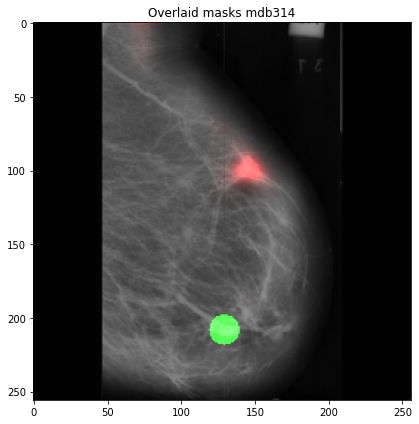

,GT_MASK,PRED_MASK,INTERSECTION
0,mdb012_gt,mdb012_predicted,1.0
1,mdb021_gt,mdb021_predicted,1.0
2,mdb023_gt,mdb023_predicted,1.0
3,mdb058_gt,mdb058_predicted,1.0
4,mdb081_gt,mdb081_predicted,1.0
5,mdb102_gt,mdb102_predicted,1.0
6,mdb148_gt,mdb148_predicted,1.0
7,mdb165_gt,mdb165_predicted,1.0
8,mdb184_gt,mdb184_predicted,1.0
9,mdb188_gt,mdb188_predicted,1.0


Average intersection: 0.9375


In [ ]:
images_path = dataPath+'/U-Net_imgs_msks_1_class(4)/test_predicted_and_GT(3OK)/test_imgs/'
gt_masks_path = dataPath+'/U-Net_imgs_msks_1_class(4)/test_predicted_and_GT(3OK)/test_GT/'
seg_masks_path = dataPath+'/U-Net_imgs_msks_1_class(4)/test_predicted_and_GT(3OK)/test_predicted/'
intersec_df = pd.DataFrame(columns=('GT_MASK', 'PRED_MASK', 'INTERSECTION'))


intersec_all(images_path,gt_masks_path, seg_masks_path, intersec_df)


display(intersec_df)
Total = (intersec_df['INTERSECTION'].sum()) / len(intersec_df.index)
print('Average intersection:', "%.4f" %Total)

imgs shape: (16, 256, 256, 3)


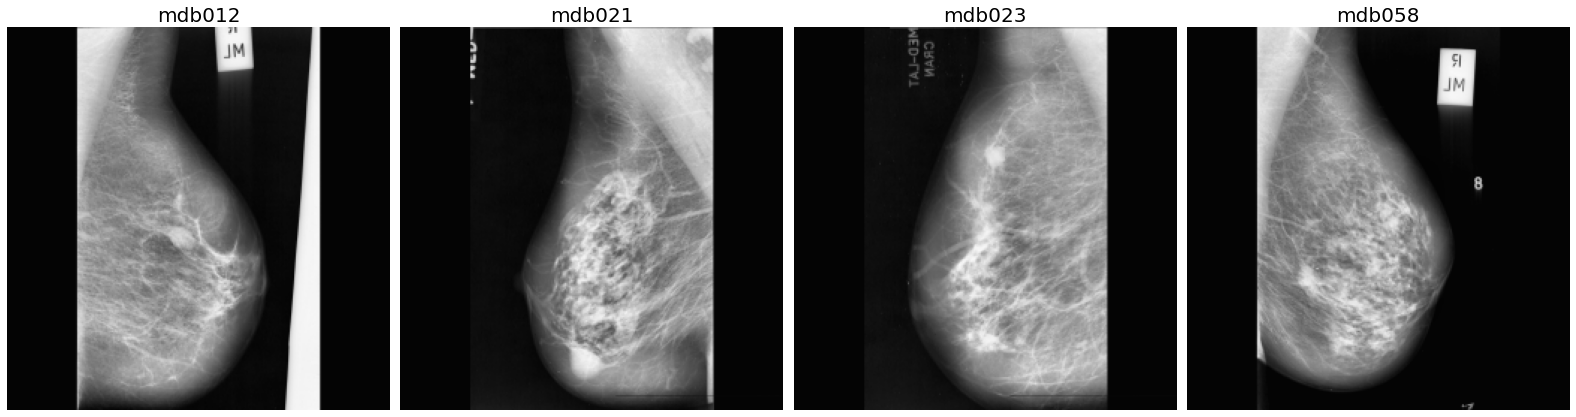

In [ ]:
imgs = []
names = []
files = glob.glob(dataPath+'/U-Net_imgs_msks_1_class(4)/test_predicted_and_GT(3OK)/test_imgs/*.png')
files = sorted(files)
for myFile in files:
    #print(myFile)
    image = cv2.imread (myFile)
    basename = os.path.basename(myFile)  # e.g. MyPhoto.jpg
    name = os.path.splitext(basename)[0]  # e.g. MyPhoto
    imgs.append(image)
    names.append(name)

print('imgs shape:', np.array(imgs).shape)
plotOrigImages(names, imgs)

In [ ]:
!python --version

Python 3.7.13


In [ ]:
cv2.__version__

'4.1.2'

In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-25612df1-5e00-0364-ea9e-6f31d5c33de1)
